## 探索llm对hubness reduction的作用

In [1]:
import numpy as np

# 加载所有嵌入文件
root = "/home/panzx/retrieval/HubnessOT/Image_Retrieval/runs/querybank/"
embedding_files = [
    "llava7B1.5_f30k.npy",
    "llava13B1.5_f30k.npy",
    "blip2opt6.7b_f30k.npy",
    "qwen2.5vl3b_f30k.npy",
    "qwen2.5vl7b_f30k.npy",
    "qwen2.5vl32b_f30k.npy",
    "qwen2.5vl72b_f30k.npy"
]
embedding_files = [root+file for file in embedding_files]

image_embeds = np.load(root+"f30k_test_imgs.npy")[::5]
text_embeds = np.load(root+"f30k_test_txts.npy")[::5]

embeddings = []
embeddings.append(image_embeds)
embeddings.append(text_embeds)
for file in embedding_files:
    emb = np.load(file)[:1000]
    embeddings.append(emb)
    print(f"{file}: shape={emb.shape}")


/home/panzx/retrieval/HubnessOT/Image_Retrieval/runs/querybank/llava7B1.5_f30k.npy: shape=(1000, 512)
/home/panzx/retrieval/HubnessOT/Image_Retrieval/runs/querybank/llava13B1.5_f30k.npy: shape=(1000, 512)
/home/panzx/retrieval/HubnessOT/Image_Retrieval/runs/querybank/blip2opt6.7b_f30k.npy: shape=(1000, 512)
/home/panzx/retrieval/HubnessOT/Image_Retrieval/runs/querybank/qwen2.5vl3b_f30k.npy: shape=(1000, 512)
/home/panzx/retrieval/HubnessOT/Image_Retrieval/runs/querybank/qwen2.5vl7b_f30k.npy: shape=(1000, 512)
/home/panzx/retrieval/HubnessOT/Image_Retrieval/runs/querybank/qwen2.5vl32b_f30k.npy: shape=(1000, 512)
/home/panzx/retrieval/HubnessOT/Image_Retrieval/runs/querybank/qwen2.5vl72b_f30k.npy: shape=(1000, 512)


In [2]:
import numpy as np
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

# 合并所有嵌入，并记录来源标签
all_embeddings = np.concatenate(embeddings, axis=0)
labels = np.concatenate([
    np.full(len(emb), i)  # 0=LSMDC, 1=qwen3b, 2=qwen7b, ...
    for i, emb in enumerate(embeddings)
])

# 降维（可调整 perplexity, n_iter 等参数）
tsne = TSNE(
    n_components=2,
    perplexity=30,
    n_iter=1000,
    random_state=42
)
embeddings_2d = tsne.fit_transform(all_embeddings)

/tmp/ipykernel_3082992/3554022862.py:28: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(


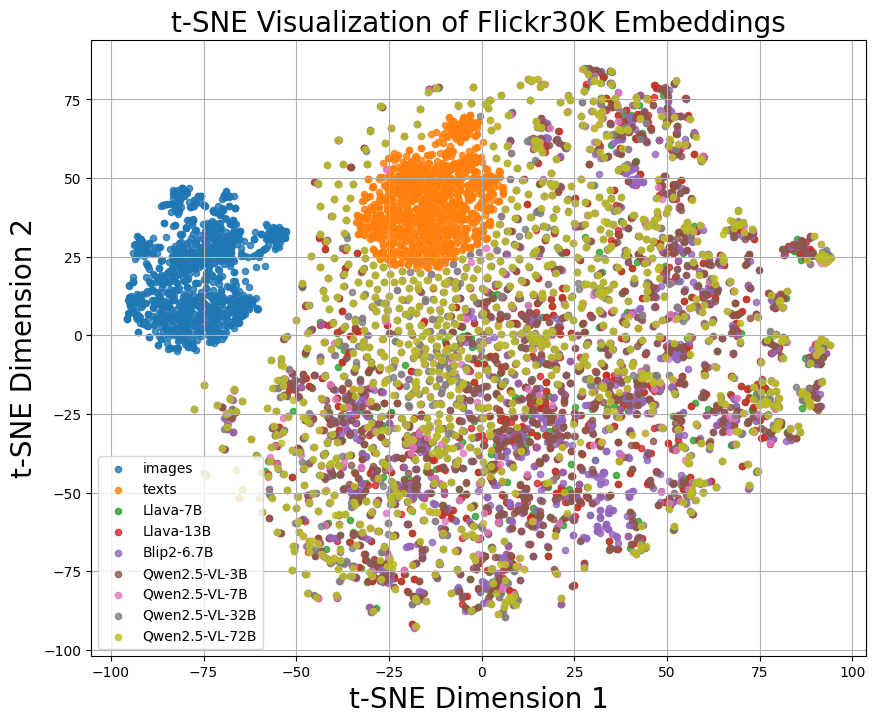

In [3]:
legend_font = {
    'family': 'Arial', # 字体
    'style': 'normal', # 样式
    'size': 16, # 字号
    'weight': 'normal' # 是否加粗
}

# 定义颜色和标签
# colors = ['red', 'blue', 'green', 'purple', 'orange']
model_names = [
    "images",
    "texts",
    "Llava-7B", 
    "Llava-13B", 
    "Blip2-6.7B", 
    "Qwen2.5-VL-3B", 
    "Qwen2.5-VL-7B", 
    "Qwen2.5-VL-32B", 
    "Qwen2.5-VL-72B"
]
colors = plt.cm.tab10(np.arange(len(model_names)) % 10)

# 绘制散点图

plt.figure(figsize=(10, 8))
for i in range(len(model_names)):
    mask = (labels == i)
    plt.scatter(
        embeddings_2d[mask, 0],
        embeddings_2d[mask, 1],
        c=colors[i],
        label=model_names[i],
        alpha=0.8,
        s=20
    )

plt.title("t-SNE Visualization of Flickr30K Embeddings", fontsize=20)
plt.xlabel("t-SNE Dimension 1", fontsize=20)
plt.ylabel("t-SNE Dimension 2", fontsize=20)
plt.legend()
plt.grid(True)
plt.show()


/tmp/ipykernel_3082992/4097635394.py:28: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(


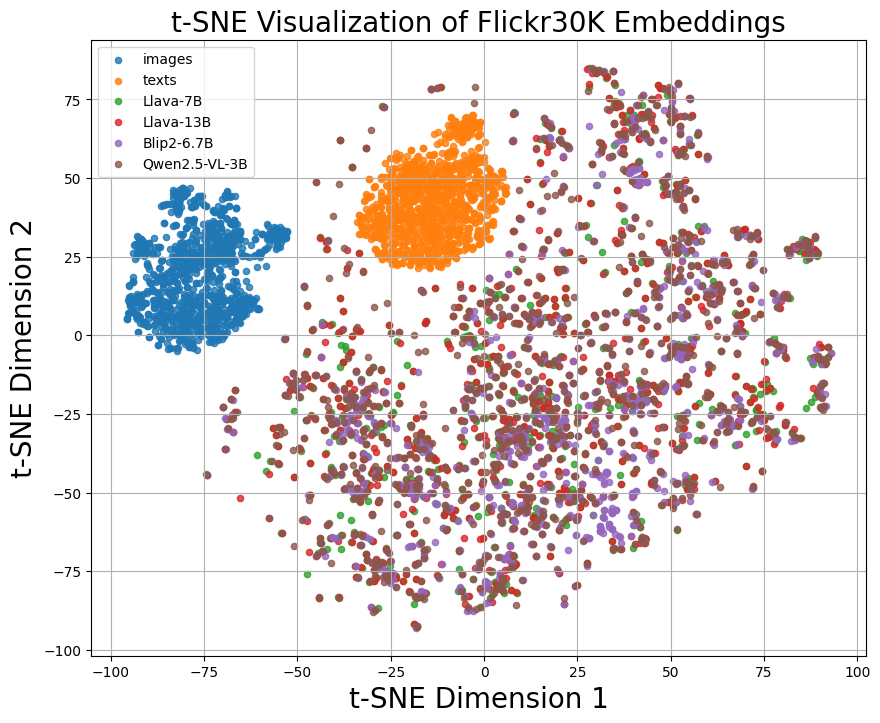

In [32]:
legend_font = {
    'family': 'Arial', # 字体
    'style': 'normal', # 样式
    'size': 16, # 字号
    'weight': 'normal' # 是否加粗
}

# 定义颜色和标签
# colors = ['red', 'blue', 'green', 'purple', 'orange']
model_names = [
    "images",
    "texts",
    "Llava-7B", 
    "Llava-13B", 
    "Blip2-6.7B", 
    "Qwen2.5-VL-3B", 
    # "Qwen2.5-VL-7B", 
    # "Qwen2.5-VL-32B", 
    # "Qwen2.5-VL-72B"
]
colors = plt.cm.tab10(np.arange(len(model_names)) % 10)

# 绘制散点图

plt.figure(figsize=(10, 8))
for i in range(len(model_names)):
    mask = (labels == i)
    plt.scatter(
        embeddings_2d[mask, 0],
        embeddings_2d[mask, 1],
        c=colors[i],
        label=model_names[i],
        alpha=0.8,
        s=20
    )

plt.title("t-SNE Visualization of Flickr30K Embeddings", fontsize=20)
plt.xlabel("t-SNE Dimension 1", fontsize=20)
plt.ylabel("t-SNE Dimension 2", fontsize=20)
plt.legend()
plt.grid(True)
plt.show()


In [12]:
import torch
import numpy as np
import ot

def isnorm(sims, tau=0.01, dim=0):
    P = torch.softmax(sims/tau, dim=dim)
    return P

def snnorm(sims, tau=0.01):
    r = torch.ones(sims.shape[0], device=sims.device)/sims.shape[0]
    c = torch.ones(sims.shape[1], device=sims.device)/sims.shape[1]
    P = ot.sinkhorn(r, c, 1-sims, reg=tau)
    return P

def chunk_sort(sim, chunk_size=1):
    N, M = sim.shape
    
    rank_per_element = torch.zeros_like(sim, dtype=torch.int32, device=sim.device)

    for i in range(0, N, chunk_size):
        end_idx = min(i + chunk_size, N)
        chunk = sim[i:end_idx]
        sorted_chunk = torch.argsort(torch.argsort(chunk, dim=1), dim=1)
        rank_per_element[i:end_idx] = sorted_chunk
    return rank_per_element
def compute_metrics_cuda(sim, gt, recalls=[1, 5, 10]):
    """
    row-wise compute ranking results using PyTorch on CUDA
    """
    device = sim.device
    gt = gt.to(device)

    # rank_per_element = torch.argsort(torch.argsort(-sim, dim=1), dim=1)
    rank_per_element = chunk_sort(-sim)

    metrics = {}

    for recall in recalls:
        pred = rank_per_element < recall
        _is_gt_recall = (pred & (gt == 1)).sum(dim=1) > 0
        r = _is_gt_recall.sum().float() / _is_gt_recall.shape[0]
        metrics[f"R{recall}"] = r.item() 

    ### no need for overall metrics
    # rank_gt = torch.min(torch.where(gt == 0, sim.shape[1], rank_per_element), dim=1)[0]
    # metrics["MedianR"] = rank_gt.median().item() + 1
    # metrics["MeanR"] = rank_gt.float().mean().item() + 1

    return metrics

def ip(text_embeds,image_embeds):
    text_embeds = text_embeds/np.linalg.norm(text_embeds,keepdims=True,axis=-1)
    sims = text_embeds @ image_embeds.T
    sims = torch.tensor(sims, device="cuda:2")
    return sims


In [13]:
root = "/home/panzx/retrieval/HubnessOT/Image_Retrieval/runs/querybank/"
image_embeds = np.load(root+"f30k_test_imgs.npy")[::5]
text_embeds = np.load(root+"f30k_test_txts.npy")[::5]

embedding_files = [
    "llava7B1.5_f30k.npy",
    "llava13B1.5_f30k.npy",
    "blip2opt6.7b_f30k.npy",
    "qwen2.5vl3b_f30k.npy",
    "qwen2.5vl7b_f30k.npy",
    "qwen2.5vl32b_f30k.npy",
    "qwen2.5vl72b_f30k.npy"
]
embedding_files = [root+file for file in embedding_files]

sims_ = ip(text_embeds, image_embeds)
gts = torch.eye(sims_.shape[0], device=sims_.device)
t2i_metrics = compute_metrics_cuda(sims_, gts)

print("Baseline Text-to-Image:")
for k, v in t2i_metrics.items():
    print(f"{k} = {100*v:.2f}")


for file in embedding_files:
    emb = np.load(file)[:1000]

    sims = ip(emb, image_embeds)
    t2i_metrics = compute_metrics_cuda(sims, gts)

    print(file.split("_f30k")[0])
    for k, v in t2i_metrics.items():
        print(f"{k} = {100*v:.2f}")

Baseline Text-to-Image:
R1 = 67.20
R5 = 89.00
R10 = 93.80
/home/panzx/retrieval/HubnessOT/Image_Retrieval/runs/querybank/llava7B1.5
R1 = 58.60
R5 = 85.20
R10 = 92.90
/home/panzx/retrieval/HubnessOT/Image_Retrieval/runs/querybank/llava13B1.5
R1 = 62.60
R5 = 88.50
R10 = 93.70
/home/panzx/retrieval/HubnessOT/Image_Retrieval/runs/querybank/blip2opt6.7b
R1 = 46.00
R5 = 73.90
R10 = 82.20
/home/panzx/retrieval/HubnessOT/Image_Retrieval/runs/querybank/qwen2.5vl3b
R1 = 56.10
R5 = 85.00
R10 = 91.60
/home/panzx/retrieval/HubnessOT/Image_Retrieval/runs/querybank/qwen2.5vl7b
R1 = 81.40
R5 = 97.10
R10 = 98.70
/home/panzx/retrieval/HubnessOT/Image_Retrieval/runs/querybank/qwen2.5vl32b
R1 = 83.60
R5 = 97.50
R10 = 99.10
/home/panzx/retrieval/HubnessOT/Image_Retrieval/runs/querybank/qwen2.5vl72b
R1 = 81.70
R5 = 97.40
R10 = 99.40


## SN对ai-generated caption是有效的

In [5]:
for file in embedding_files:
    emb = np.load(file)[:1000]

    sims = ip(emb, image_embeds)
    t2i_metrics = compute_metrics_cuda(sims, gts)
    is_metrics = compute_metrics_cuda(isnorm(sims, tau=0.05), gts)
    sn_metrics = compute_metrics_cuda(snnorm(sims, tau=0.01), gts)
    model_name = file.split("_f30k")[0]
    print(model_name)
    for k, v in t2i_metrics.items():
        print(f"{k} = {100*v:.2f}")
    print(model_name+ "_IS")
    for k, v in is_metrics.items():
        print(f"{k} = {100*v:.2f}")
    print(model_name+ "_SN")
    for k, v in sn_metrics.items():
        print(f"{k} = {100*v:.2f}")
    print("\n")

/home/panzx/.conda/envs/clip/lib/python3.8/site-packages/ot/bregman/_sinkhorn.py:531: UserWarning: Sinkhorn did not converge. You might want to increase the number of iterations `numItermax` or the regularization parameter `reg`.
  warnings.warn("Sinkhorn did not converge. You might want to "


/home/panzx/retrieval/HubnessOT/Image_Retrieval/runs/querybank/llava7B1.5
R1 = 58.60
R5 = 85.20
R10 = 92.90
/home/panzx/retrieval/HubnessOT/Image_Retrieval/runs/querybank/llava7B1.5_IS
R1 = 67.00
R5 = 87.70
R10 = 93.40
/home/panzx/retrieval/HubnessOT/Image_Retrieval/runs/querybank/llava7B1.5_SN
R1 = 83.20
R5 = 95.70
R10 = 98.50


/home/panzx/retrieval/HubnessOT/Image_Retrieval/runs/querybank/llava13B1.5
R1 = 62.60
R5 = 88.50
R10 = 93.70
/home/panzx/retrieval/HubnessOT/Image_Retrieval/runs/querybank/llava13B1.5_IS
R1 = 69.80
R5 = 88.40
R10 = 94.00
/home/panzx/retrieval/HubnessOT/Image_Retrieval/runs/querybank/llava13B1.5_SN
R1 = 86.00
R5 = 97.40
R10 = 99.00


/home/panzx/retrieval/HubnessOT/Image_Retrieval/runs/querybank/blip2opt6.7b
R1 = 46.00
R5 = 73.90
R10 = 82.20
/home/panzx/retrieval/HubnessOT/Image_Retrieval/runs/querybank/blip2opt6.7b_IS
R1 = 50.30
R5 = 78.60
R10 = 84.10
/home/panzx/retrieval/HubnessOT/Image_Retrieval/runs/querybank/blip2opt6.7b_SN
R1 = 63.40
R5 = 85.70
R10 = 91.

## 非真人的描述无法作为querybank

In [31]:
# def Inverted_Softmax(sims, v_tau=0.01, t_tau=0.02):
#     v_hubness = v_tau * torch.log(torch.exp(sims / v_tau).sum(dim=0, keepdim=True))
#     t_hubness = t_tau * torch.log(torch.exp(sims / t_tau).sum(dim=1, keepdim=True))
#     return v_hubness, t_hubness

# def Sinkhorn_Normalization(sims, tau=0.01):
#     device = sims.device
#     n_queries, n_targets = sims.shape
#     r = torch.ones(n_queries, device=device) / n_queries
#     c = torch.ones(n_targets, device=device) / n_targets
#     P, log = ot.sinkhorn(r, c, 1 - sims, reg=tau, log=True)
#     v_hubness = -tau * torch.log(log['v'].to(device))  # [1, n_targets]
#     t_hubness = -tau * torch.log(log['u'].to(device))  # [n_queries, 1]
#     return v_hubness, t_hubness

def Inverted_Softmax(_sims, v_tau, t_tau):
    sims = _sims.detach().cpu().numpy()
    v_hubness = v_tau*np.log(np.exp(sims/v_tau).sum(axis=0,keepdims=True))
    t_hubness = t_tau*np.log(np.exp(sims/t_tau).sum(axis=1,keepdims=True))
    v_hubness = torch.tensor(v_hubness, device=_sims.device)
    t_hubness = torch.tensor(t_hubness, device=_sims.device)
    return v_hubness, t_hubness

def Sinkhorn_Normalization(_sims, tau=0.01):
    sims = _sims.detach().cpu().numpy()
    r = np.ones(sims.shape[0])/sims.shape[0]
    c = np.ones(sims.shape[1])/sims.shape[1]
    P, logs = ot.sinkhorn(r, c, 1-sims, reg=tau, log=True)
    v_hubness = -tau * np.log(logs["v"])
    t_hubness = -tau * np.log(logs["u"])
    v_hubness = torch.tensor(v_hubness, device=_sims.device)
    t_hubness = torch.tensor(t_hubness, device=_sims.device)
    return v_hubness, t_hubness

for file in embedding_files:
    emb = np.load(file)[:1000]

    sims = ip(emb, image_embeds)
    t2i_metrics = compute_metrics_cuda(sims_, gts)
    v_hubness, t_hubness = Inverted_Softmax(sims, v_tau=0.02, t_tau=0.02)
    is_metrics = compute_metrics_cuda(sims_-v_hubness, gts)
    v_hubness, t_hubness = Sinkhorn_Normalization(sims, tau=0.015)
    sn_metrics = compute_metrics_cuda(sims_-v_hubness, gts)
    model_name = file.split("_f30k")[0]
    print(model_name)
    for k, v in t2i_metrics.items():
        print(f"{k} = {100*v:.2f}")
    print(model_name+ "_IS")
    for k, v in is_metrics.items():
        print(f"{k} = {100*v:.2f}")
    print(model_name+ "_SN")
    for k, v in sn_metrics.items():
        print(f"{k} = {100*v:.2f}")
    print("\n")

/home/panzx/retrieval/HubnessOT/Image_Retrieval/runs/querybank/llava7B1.5
R1 = 67.20
R5 = 89.00
R10 = 93.80
/home/panzx/retrieval/HubnessOT/Image_Retrieval/runs/querybank/llava7B1.5_IS
R1 = 72.00
R5 = 92.70
R10 = 95.90
/home/panzx/retrieval/HubnessOT/Image_Retrieval/runs/querybank/llava7B1.5_SN
R1 = 73.40
R5 = 92.60
R10 = 95.90


/home/panzx/retrieval/HubnessOT/Image_Retrieval/runs/querybank/llava13B1.5
R1 = 67.20
R5 = 89.00
R10 = 93.80
/home/panzx/retrieval/HubnessOT/Image_Retrieval/runs/querybank/llava13B1.5_IS
R1 = 73.20
R5 = 92.40
R10 = 95.70
/home/panzx/retrieval/HubnessOT/Image_Retrieval/runs/querybank/llava13B1.5_SN
R1 = 74.10
R5 = 92.90
R10 = 96.00


/home/panzx/retrieval/HubnessOT/Image_Retrieval/runs/querybank/blip2opt6.7b
R1 = 67.20
R5 = 89.00
R10 = 93.80
/home/panzx/retrieval/HubnessOT/Image_Retrieval/runs/querybank/blip2opt6.7b_IS
R1 = 72.20
R5 = 91.90
R10 = 95.50
/home/panzx/retrieval/HubnessOT/Image_Retrieval/runs/querybank/blip2opt6.7b_SN
R1 = 73.20
R5 = 91.90
R10 = 95.

In [29]:
file = "f30k_test_txts.npy"
emb = np.load(root+file)[0::5]

sims = ip(emb, image_embeds)
t2i_metrics = compute_metrics_cuda(sims_, gts)
v_hubness, t_hubness = Inverted_Softmax(sims, v_tau=0.02, t_tau=0.02)
is_metrics = compute_metrics_cuda(sims_-v_hubness, gts)
v_hubness, t_hubness = Sinkhorn_Normalization(sims, tau=0.01)
sn_metrics = compute_metrics_cuda(sims_-v_hubness, gts)
model_name = file.split("_f30k")[0]
print(model_name)
for k, v in t2i_metrics.items():
    print(f"{k} = {100*v:.2f}")
print(model_name+ "_IS")
for k, v in is_metrics.items():
    print(f"{k} = {100*v:.2f}")
print(model_name+ "_SN")
for k, v in sn_metrics.items():
    print(f"{k} = {100*v:.2f}")
print("\n")


f30k_test_txts.npy
R1 = 67.20
R5 = 89.00
R10 = 93.80
f30k_test_txts.npy_IS
R1 = 78.20
R5 = 93.50
R10 = 96.40
f30k_test_txts.npy_SN
R1 = 83.70
R5 = 95.50
R10 = 97.80


